In [330]:
'''
Introduction-
The energy consumption of urban areas is a critical parameter that 
reflects the city's lifestyle, industrial activity, and overall energy efficiency. 
For regions with varying environmental conditions, like Tetouan city in northern Morocco,
predicting power consumption becomes even more crucial. Accurate forecasting helps in better planning, 
efficient energy distribution, and reducing power outages. This project aims to leverage machine learning 
techniques to predict the power consumption in Tetouan city, considering various environmental factors.

Problem Statement-
Tetouan city is divided into three different distribution networks, 
each representing a specific zone. The power consumption data of these 
zones can vary based on multiple environmental factors such as temperature,
humidity, and wind speed. The challenge lies in accurately predicting the average
power consumption of the city based on these independent variables.
By applying machine learning models, specifically Random Forest Regression, 
XGBoost Regression, and KNN Regression, the goal is to build a robust predictive 
model that can forecast the city's energy demands.

Aim of the Project-
The primary objective of this project is to develop a machine learning model that 
can accurately predict the average power consumption of Tetouan city. 
The model will utilize historical data related to environmental factors and 
power consumption from three different zones. The focus will be on comparing the performance 
of Random Forest Regression, XGBoost Regression, and KNN Regression models to 
determine the most effective approach for predicting power consumption.

Data Variables Description
- DateTime (Feature): The timestamp of the data recorded every ten minutes.
- Temperature (Feature): Continuous variable representing the weather temperature of Tetouan city.
- Humidity (Feature): Continuous variable representing the humidity levels in Tetouan city.
- Wind Speed (Feature): Continuous variable representing the wind speed in Tetouan city.
- General Diffuse Flows (Feature): Continuous variable representing the general diffuse flows.
- Diffuse Flows (Feature): Continuous variable representing the diffuse flows.
- Zone 1 Power Consumption (Target): Continuous variable representing the power consumption in Zone 1 of Tetouan city.
- Zone 2 Power Consumption (Target): Continuous variable representing the power consumption in Zone 2 of Tetouan city.
- Zone 3 Power Consumption (Target): Continuous variable representing the power consumption in Zone 3 of Tetouan city.
'''

"\nIntroduction-\nThe energy consumption of urban areas is a critical parameter that \nreflects the city's lifestyle, industrial activity, and overall energy efficiency. \nFor regions with varying environmental conditions, like Tetouan city in northern Morocco,\npredicting power consumption becomes even more crucial. Accurate forecasting helps in better planning, \nefficient energy distribution, and reducing power outages. This project aims to leverage machine learning \ntechniques to predict the power consumption in Tetouan city, considering various environmental factors.\n\nProblem Statement-\nTetouan city is divided into three different distribution networks, \neach representing a specific zone. The power consumption data of these \nzones can vary based on multiple environmental factors such as temperature,\nhumidity, and wind speed. The challenge lies in accurately predicting the average\npower consumption of the city based on these independent variables.\nBy applying machine learn

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

In [209]:
#Using Random Forest Machine Learning Algorithm 
#Reading the data set.
df = pd.read_csv("C://Users//HP//Downloads//power+consumption+of+tetouan+city (1).zip")

In [211]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [215]:
df.isnull().sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [217]:
df.columns

Index(['DateTime', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [219]:
df.drop(['DateTime'], axis=1, inplace = True)

In [221]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [223]:
#finding out the avaergae power consumption as there are three target variables
df['Avg Power Consumption'] = (df['Zone 1 Power Consumption']+df['Zone 2  Power Consumption']+df['Zone 3  Power Consumption'])/3

In [225]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Avg Power Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,23475.178480
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,23106.947957
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,22601.073977
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,21829.744030
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,21216.815423


In [227]:
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Avg Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218,23740.961955
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099,5714.379655
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070,12261.679913
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630,18833.024880
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470,23262.930313
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420,27916.390770
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360,44736.048650


In [229]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption',
       'Avg Power Consumption'],
      dtype='object')

In [231]:
#Perform scaling
from sklearn.preprocessing import StandardScaler

In [233]:
ss = StandardScaler()

In [235]:
cols= ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows']

In [237]:
df[cols]=ss.fit_transform(df[cols])

In [239]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Avg Power Consumption
0,-2.106645,0.356277,-0.798900,-0.690797,-0.603085,34055.69620,16128.87538,20240.96386,23475.178480
1,-2.131578,0.401291,-0.798900,-0.690725,-0.603359,29814.68354,19375.07599,20131.08434,23106.947957
2,-2.148946,0.401291,-0.800178,-0.690755,-0.603238,29128.10127,19006.68693,19668.43373,22601.073977
3,-2.181962,0.433443,-0.798900,-0.690646,-0.603270,28228.86076,18361.09422,18899.27711,21829.744030
4,-2.216353,0.478456,-0.799752,-0.690808,-0.603359,27335.69620,17872.34043,18442.40964,21216.815423


In [241]:
#Dividing the data set into training and testing
from sklearn.model_selection import train_test_split

In [243]:
X = df[['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows']]
Y = df[['Avg Power Consumption']]

In [245]:
#Dividing the Dataset into training and testing

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3) #70% training part

In [247]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf1=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,Y_train)

Y_pred1=clf1.predict(X_test)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [250]:
Y_pred1

array([17162.56542095, 29624.30330686, 23355.95080493, ...,
       31034.16585833, 22842.63518567, 29317.1941974 ])

In [260]:
Y_test

,Avg Power Consumption
16743,16482.829803
107,29605.952980
39496,16660.193372
13090,29179.056730
48258,15412.598460
...,...
11322,23661.972643
15572,17606.773880
30321,31039.276930
52050,22100.368657


In [262]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [264]:
#finding out the erors present in the modelprint ("Random Forest Regressor...")
print("Mean Absolute Error: ",mean_absolute_error(Y_pred1,Y_test), "Mean Squared Error: ", mean_squared_error(Y_pred1,Y_test))

Mean Absolute Error:  2385.232139277842 Mean Squared Error:  12085924.925916739


In [266]:
#finding out important features of the model
feature_imp = pd.Series(clf1.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Temperature              0.429903
Humidity                 0.197781
general diffuse flows    0.138556
Wind Speed               0.133312
diffuse flows            0.100448
dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_19684\3961762905.py:13: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.barplot(x=feature_imp, y=feature_imp.index, hue=feature_imp.index, palette=custom_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


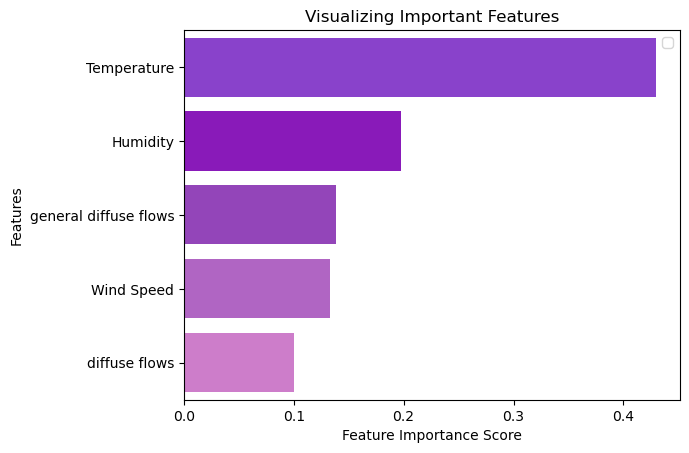

In [268]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Custom shades of purple and pink
custom_colors = [
    "#8A2BE2", "#9400D3", "#9932CC", "#BA55D3", "#DA70D6", 
    "#EE82EE", "#D8BFD8", "#DDA0DD", "#FF69B4", "#FF1493", 
    "#FFB6C1", "#FFC0CB", "#DB7093"
]

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, hue=feature_imp.index, palette=custom_colors)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [270]:
from sklearn.tree import plot_tree

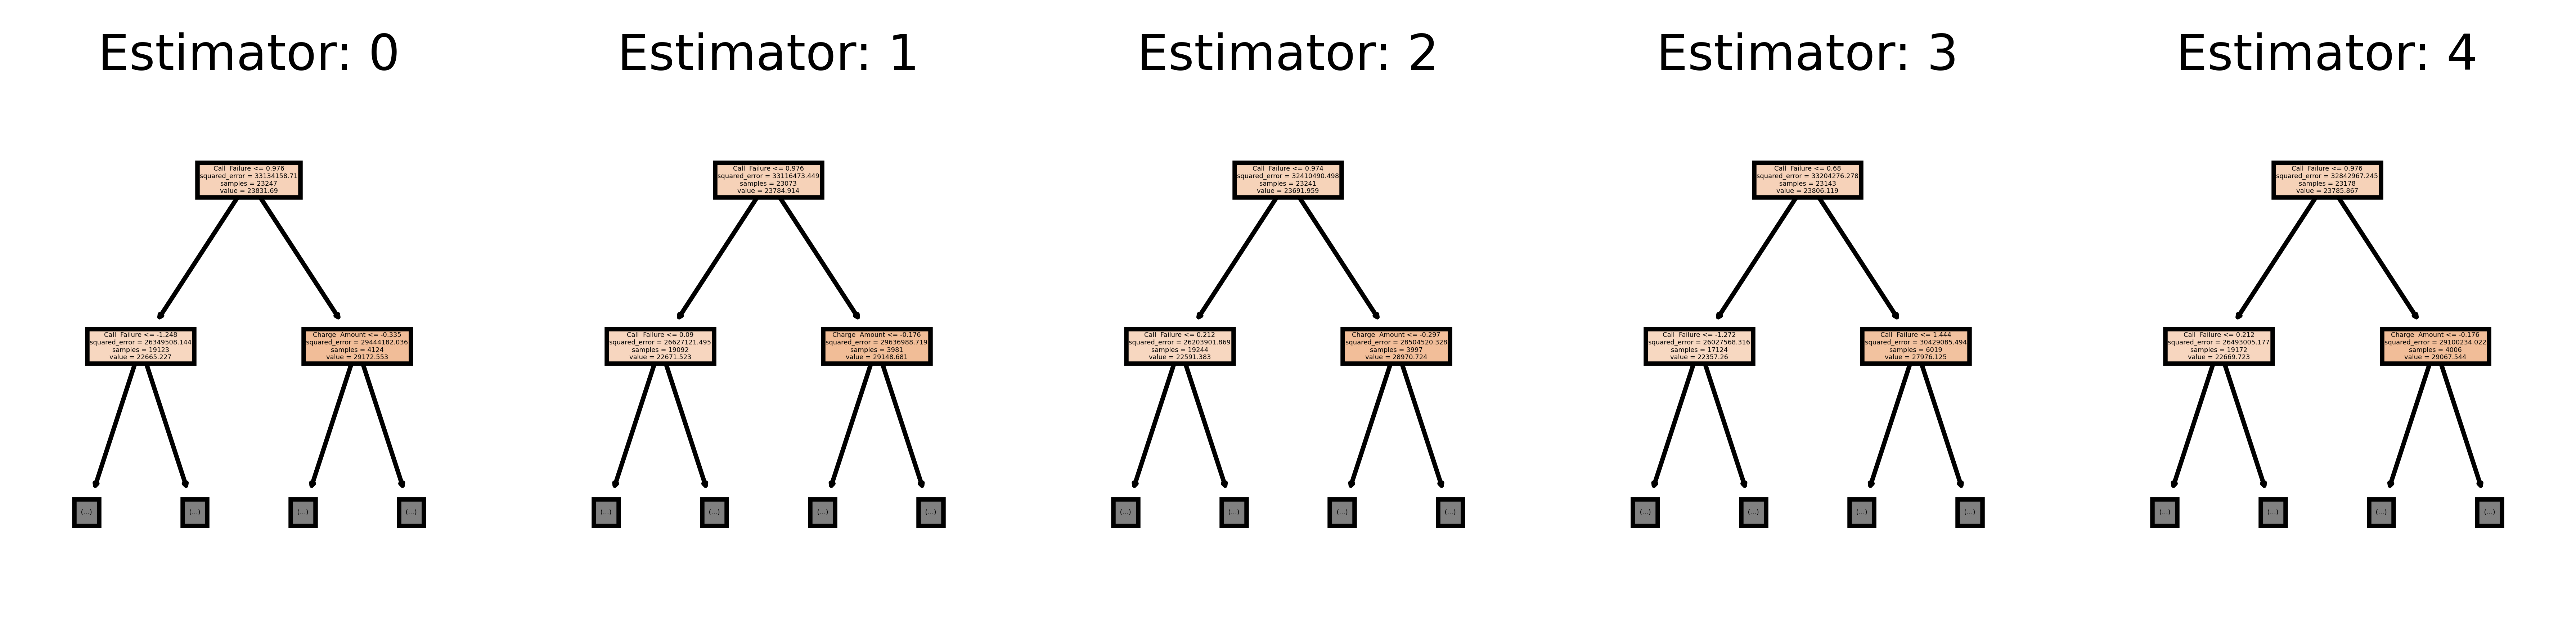

In [272]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf1.estimators_[index],
                   max_depth=1,
                   feature_names = ['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value'],
                   class_names=["0", "1"],
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

In [274]:
#Using XGBoost Machine Learning Algorithm 
#Import XGBoost
import xgboost as xgb

xgbclass = xgb.XGBRegressor()
xgbclass.fit(X_train, Y_train)

Y_pred2=xgbclass.predict(X_test)

In [276]:
xgbclass.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [278]:
Y_pred2 = xgbclass.predict(X_test)

In [280]:
Y_pred2

array([18940.365, 29117.342, 22002.152, ..., 30997.566, 21791.342,
       32254.55 ], dtype=float32)

In [282]:
Y_test

,Avg Power Consumption
16743,16482.829803
107,29605.952980
39496,16660.193372
13090,29179.056730
48258,15412.598460
...,...
11322,23661.972643
15572,17606.773880
30321,31039.276930
52050,22100.368657


In [284]:
#finding out the erors present in the modelprint ("XGB Regressor...")
print("Mean Absolute Error: ",mean_absolute_error(Y_pred2,Y_test), "Mean Squared Error: ", mean_squared_error(Y_pred2,Y_test))

Mean Absolute Error:  2777.797616229902 Mean Squared Error:  14316410.744056176


In [286]:
#finding out important features of the model
feature_imp1 = pd.Series(xgbclass.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp1

Temperature              0.403382
general diffuse flows    0.180048
Humidity                 0.157581
Wind Speed               0.155670
diffuse flows            0.103319
dtype: float32

C:\Users\HP\AppData\Local\Temp\ipykernel_19684\2012194926.py:11: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.barplot(x=feature_imp1, y=feature_imp1.index, hue=feature_imp1.index, palette=cool_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


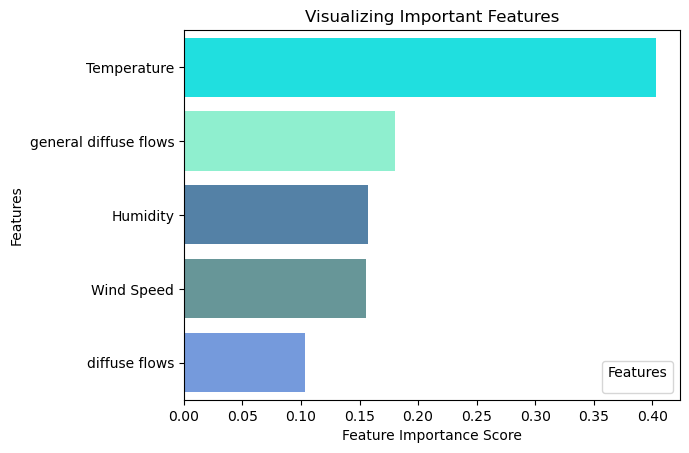

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Cool color palette
cool_colors = [
    "#00FFFF", "#7FFFD4", "#4682B4", "#5F9EA0", "#6495ED", "#40E0D0",
    "#1E90FF", "#87CEFA", "#4169E1", "#8A2BE2", "#7B68EE", "#00CED1", "#708090"]

# Creating a bar plot
sns.barplot(x=feature_imp1, y=feature_imp1.index, hue=feature_imp1.index, palette=cool_colors)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend(title="Features")
plt.show()


In [290]:
#Using KNN Machine Learning Algorithm 
from sklearn.neighbors import KNeighborsRegressor

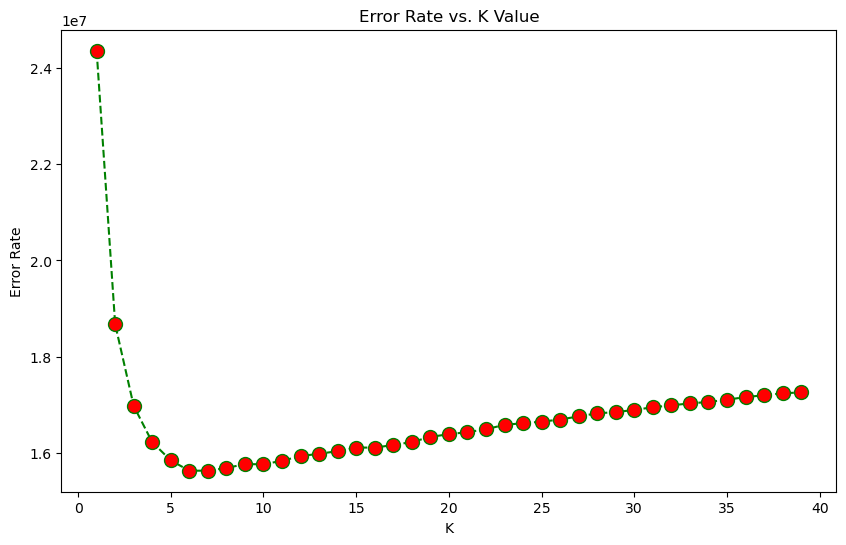

Minimum error:- 15635026.38195779 at K = 6


In [292]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsRegressor(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(mean_squared_error(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [294]:
knn = KNeighborsRegressor(n_neighbors=6)

In [296]:
knn.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=6)

In [298]:
Y_pred3 = knn.predict(X_test)

In [300]:
Y_pred3

array([[17437.59343889],
       [27093.99693889],
       [22993.86383056],
       ...,
       [30010.40627333],
       [21389.96514933],
       [28558.54973667]])

In [302]:
Y_test

,Avg Power Consumption
16743,16482.829803
107,29605.952980
39496,16660.193372
13090,29179.056730
48258,15412.598460
...,...
11322,23661.972643
15572,17606.773880
30321,31039.276930
52050,22100.368657


In [304]:
#finding out the erors present in the modelprint ("KNN Regressor...")
print("Mean Absolute Error: ",mean_absolute_error(Y_pred3,Y_test), "Mean Squared Error: ", mean_squared_error(Y_pred3,Y_test))

Mean Absolute Error:  2720.5355209958066 Mean Squared Error:  15635026.38195779


In [306]:
feature_imp2 = pd.Series(xgbclass.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp2

Temperature              0.403382
general diffuse flows    0.180048
Humidity                 0.157581
Wind Speed               0.155670
diffuse flows            0.103319
dtype: float32

C:\Users\HP\AppData\Local\Temp\ipykernel_19684\1500568880.py:11: UserWarning: The palette list has more values (13) than needed (5), which may not be intended.
  sns.barplot(x=feature_imp2, y=feature_imp2.index, hue=feature_imp2.index, palette=warm_colors)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


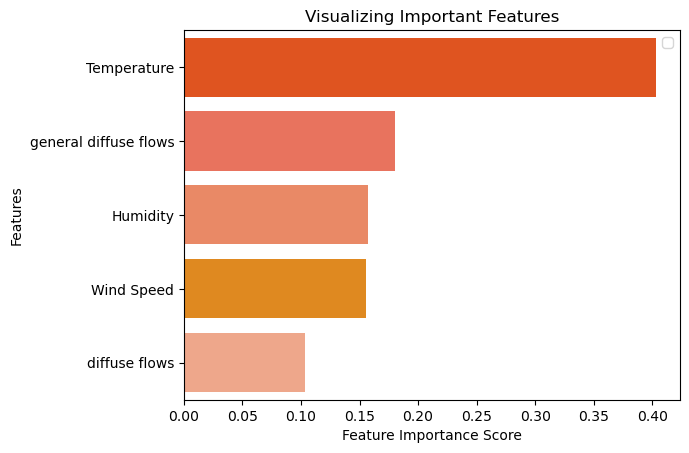

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a palette of warm colors
warm_colors = [
    "#FF4500", "#FF6347", "#FF7F50", "#FF8C00", "#FFA07A", "#FFD700", 
    "#FFC300", "#FFB6C1", "#FFA500", "#FF1493", "#FF69B4", "#FF6347", "#FF4500"
]

# Creating a bar plot with warm colors
sns.barplot(x=feature_imp2, y=feature_imp2.index, hue=feature_imp2.index, palette=warm_colors)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [310]:
#Reading the test data file and to predict the average power consumption
Test_data = pd.read_csv("C://Users//HP//OneDrive//Desktop//Test data.csv")

In [312]:
Test_data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,01-01-2017 02:10,4.968,78.8,0.084,0.07,0.134


In [314]:
Test_data.drop(['DateTime'], axis=1, inplace = True)

In [316]:
Test_data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,4.968,78.8,0.084,0.07,0.134


In [318]:
Test_data.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows'],
      dtype='object')

In [320]:
Test_data['Temperature']=ss.fit_transform(Test_data[['Temperature']])
Test_data['Humidity']=ss.fit_transform(Test_data[['Humidity']])
Test_data['Wind Speed']=ss.fit_transform(Test_data[['Wind Speed']])
Test_data['general diffuse flows']=ss.fit_transform(Test_data[['general diffuse flows']])
Test_data['diffuse flows']=ss.fit_transform(Test_data[['diffuse flows']])

In [322]:
Test_data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,0.0,0.0,0.0,0.0,0.0


In [324]:
clf1.predict(Test_data)

array([19747.64991221])

In [326]:
xgbclass.predict(Test_data)

array([21902.809], dtype=float32)

In [328]:
knn.predict(Test_data)

array([[17996.44565322]])

In [334]:
'''
Detailed Analysis of the Power Consumption Prediction Models
I. Feature Importance Analysis
Feature importance helps in understanding which independent variables
most significantly impact the prediction of average power consumption. 
Below is a breakdown of the important features identified by each model:

Random Forest Regressor:

Temperature: 0.429903
Humidity: 0.197781
General Diffuse Flows: 0.138556
Wind Speed: 0.133312
Diffuse Flows: 0.100448

XGBoost Regressor:

Temperature: 0.403382
General Diffuse Flows: 0.180048
Humidity: 0.157581
Wind Speed: 0.155670
Diffuse Flows: 0.103319

KNN Regressor:

Temperature: 0.403382
General Diffuse Flows: 0.180048
Humidity: 0.157581
Wind Speed: 0.155670
Diffuse Flows: 0.103319

Key Observations:

1.Temperature is consistently the most important feature across all three models, 
indicating its strong influence on power consumption in Tetouan city.

2.General Diffuse Flows and Humidity are also significant, though their rankings vary slightly between the models.

3.Wind Speed and Diffuse Flows have relatively lower importance but are still relevant in the prediction process.

II. Model Performance Evaluation
The performance of the three models was evaluated using Mean Absolute Error (MAE) and Mean Squared Error (MSE), 
two standard metrics for regression analysis:

Random Forest Regressor:

Mean Absolute Error: 2385.23
Mean Squared Error: 12,085,924.93

XGBoost Regressor:

Mean Absolute Error: 2777.80
Mean Squared Error: 14,316,410.74

KNN Regressor:

Mean Absolute Error: 2720.54
Mean Squared Error: 15,635,026.38

Key Observations:

The Random Forest Regressor outperforms the other models in terms of both MAE and MSE, 
indicating it is the most accurate model for predicting average power consumption in this dataset.
The XGBoost Regressor has the highest MAE and MSE, suggesting it may not be the best
choice for this specific prediction task.
The KNN Regressor falls between the two in terms of error metrics, 
showing reasonable accuracy but not as strong as Random Forest.

III. Prediction on New Data:

A new data point with the following features was fed into the models:

DateTime: 01-01-2017 02:10
Temperature: 4.968
Humidity: 78.8
Wind Speed: 0.084
General Diffuse Flows: 0.07
Diffuse Flows: 0.134
The actual average power consumption from the original data was 17,620.59831. 
The predictions from the models were as follows:

Random Forest Regressor: 19,747.65
XGBoost Regressor: 21,902.81
KNN Regressor: 17,996.45

IV. Key Observations:

1.The KNN Regressor predicted the closest value to the actual average power consumption,
showing a relatively small deviation of about 375.85 units.
2.The Random Forest Regressor over-predicted by approximately 2,127.05 units, 
which is a significant difference but still closer than the XGBoost model.
3.The XGBoost Regressor had the largest deviation, over-predicting by 4,282.21 units.
'''


'\nDetailed Analysis of the Power Consumption Prediction Models\nI. Feature Importance Analysis\nFeature importance helps in understanding which independent variables\nmost significantly impact the prediction of average power consumption. \nBelow is a breakdown of the important features identified by each model:\n\nRandom Forest Regressor:\n\nTemperature: 0.429903\nHumidity: 0.197781\nGeneral Diffuse Flows: 0.138556\nWind Speed: 0.133312\nDiffuse Flows: 0.100448\n\nXGBoost Regressor:\n\nTemperature: 0.403382\nGeneral Diffuse Flows: 0.180048\nHumidity: 0.157581\nWind Speed: 0.155670\nDiffuse Flows: 0.103319\n\nKNN Regressor:\n\nTemperature: 0.403382\nGeneral Diffuse Flows: 0.180048\nHumidity: 0.157581\nWind Speed: 0.155670\nDiffuse Flows: 0.103319\n\nKey Observations:\n\n1.Temperature is consistently the most important feature across all three models, \nindicating its strong influence on power consumption in Tetouan city.\n\n2.General Diffuse Flows and Humidity are also significant, tho